In [6]:
import glob, pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
files = sorted(glob.glob("data/chunks/part_*.parquet"))
df = pd.read_parquet(files[0])  # inspect the first chunk

In [8]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
0,192.168.1.90-192.168.1.3-53930-64738-6,192.168.1.90,53930.0,192.168.1.3,64738,6.0,01/01/1970 07:41:46 AM,52601172.0,1701.0,1793.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign,Audio,Audio
1,192.168.1.3-192.168.1.90-64738-37700-6,192.168.1.3,64738.0,192.168.1.90,37700,6.0,01/01/1970 07:41:46 AM,119106944.0,36.0,57.0,...,3416174.0,19996926.0,14078617.0,5001511.0,1737.400024,5003516.0,5000449.0,Benign,Audio,Audio
2,192.168.1.3-192.168.1.90-22-40854-6,192.168.1.3,22.0,192.168.1.90,40854,6.0,01/01/1970 07:41:46 AM,5589.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign,Audio,Audio
3,192.168.1.70-192.168.1.3-55422-64738-6,192.168.1.70,55422.0,192.168.1.3,64738,6.0,01/01/1970 07:41:47 AM,118166560.0,3932.0,4196.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign,Audio,Audio
4,192.168.1.90-192.168.1.3-59658-64738-17,192.168.1.90,59658.0,192.168.1.3,64738,17.0,01/01/1970 07:41:50 AM,119988384.0,25.0,6795.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign,Audio,Audio


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 86 columns):
 #   Column                      Non-Null Count    Dtype   
---  ------                      --------------    -----   
 0   Flow ID                     1000000 non-null  category
 1   Src IP                      1000000 non-null  category
 2   Src Port                    1000000 non-null  float32 
 3   Dst IP                      1000000 non-null  category
 4   Dst Port                    1000000 non-null  int32   
 5   Protocol                    1000000 non-null  float32 
 6   Timestamp                   1000000 non-null  category
 7   Flow Duration               1000000 non-null  float32 
 8   Total Fwd Packet            1000000 non-null  float32 
 9   Total Bwd packets           1000000 non-null  float32 
 10  Total Length of Fwd Packet  1000000 non-null  float32 
 11  Total Length of Bwd Packet  1000000 non-null  float32 
 12  Fwd Packet Length Max       1000000 non-nul

In [10]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1000000.00000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.00,1000000.0,1.000000e+06
mean,31818.96875,56.145504,7.471731,1.000708e+07,3.596341,1.926950,295.090912,5.654099e+02,100.180473,47.448887,...,1.484198,20.126455,4.773253e+05,8.606815e+04,5.519174e+05,4.100172e+05,5.725341e+06,745100.25,6380120.0,5.149398e+06
std,19305.25000,1667.958137,3.745569,1.494340e+07,390.606659,150.571045,2630.872803,2.929608e+04,223.003296,33.159542,...,23.194845,7.261347,1.316522e+06,5.015348e+05,1.591832e+06,1.162272e+06,8.425127e+06,2578503.75,9390216.0,7.967268e+06
min,0.00000,0.000000,0.000000,1.500000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.0,0.000000e+00
25%,14349.00000,0.000000,6.000000,3.562500e+04,1.000000,0.000000,50.000000,0.000000e+00,50.000000,50.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.0,0.000000e+00
50%,31975.00000,0.000000,6.000000,2.028744e+06,2.000000,1.000000,100.000000,0.000000e+00,50.000000,50.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.0,0.000000e+00
75%,48640.00000,0.000000,6.000000,1.446268e+07,2.000000,1.000000,100.000000,0.000000e+00,50.000000,50.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000970e+07,0.00,10786657.0,8.746128e+06
max,65535.00000,64738.000000,17.000000,1.199996e+08,314483.000000,140243.000000,519561.000000,1.687288e+06,1368.000000,1368.000000,...,5015.000000,44.000000,8.531760e+07,7.069982e+07,9.998708e+07,8.531760e+07,1.151276e+08,66850696.00,115127624.0,1.151276e+08


In [11]:
df['Protocol'].value_counts()

Protocol
6.0     866112
17.0    133827
0.0         61
Name: count, dtype: int64

In [12]:
df['Label'].value_counts()

Label
Malicious    999778
Benign          222
Name: count, dtype: int64

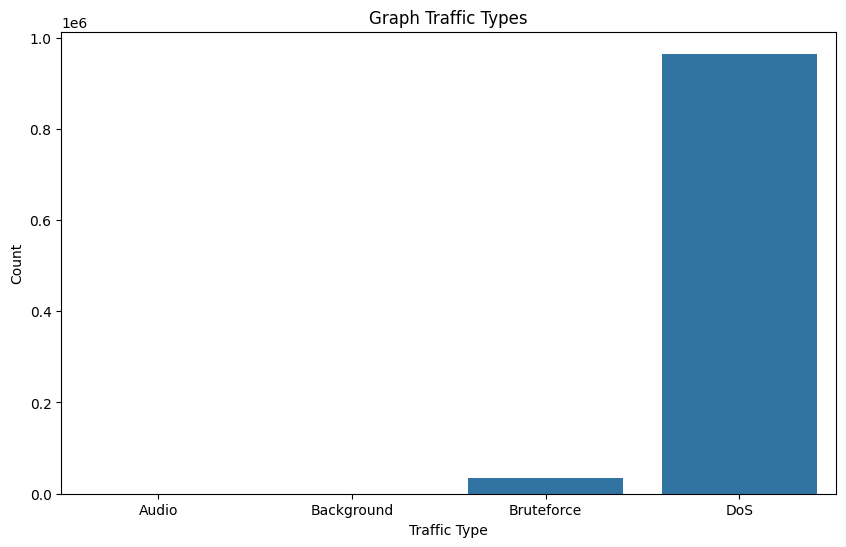

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Traffic Type', data=df)
plt.title('Graph Traffic Types')
plt.xlabel('Traffic Type')
plt.ylabel('Count')

plt.show()

In [14]:
df.describe()
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [15]:
from collections import Counter

files = sorted(glob.glob("data/chunks/part_*.parquet"))

counts = Counter()
total = 0
for f in files:
    s = pd.read_parquet(f, columns=["Traffic Type"])
    counts.update(s['Traffic Type'].astype('string').fillna('<NA>'))
    total += len(s)

top_ip, top_cnt = counts.most_common(1)[0]
top_share = top_cnt / total
print(f"unique values: {len(counts)}, top share: {top_share:.6f}")
pairs = counts.most_common()  
for ip, cnt in pairs:         
    print(ip, cnt)


unique values: 8, top share: 0.865326
DoS 7490929
Information Gathering 1038363
Mirai 91002
Bruteforce 35172
Video 870
Text 209
Audio 190
Background 32


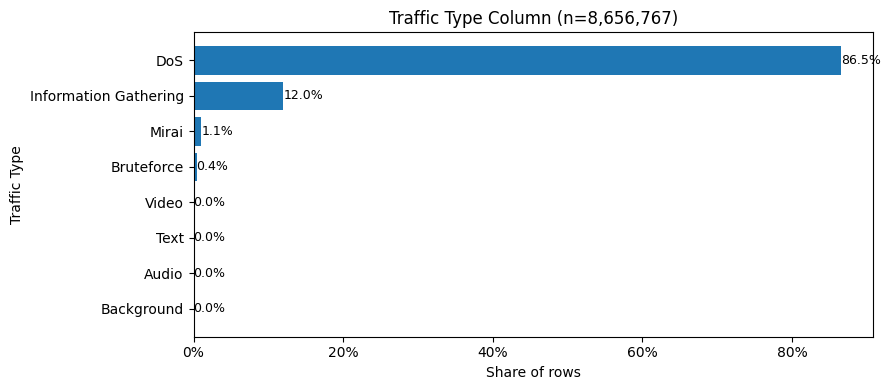

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# 1) to DataFrame sorted by count
vc = (pd.Series(counts, dtype="int64")
        .sort_values(ascending=False)
        .rename_axis("Traffic Type")
        .to_frame("count"))
vc["share"] = vc["count"] / total

# 2) plot share (percent)
plt.figure(figsize=(9, 4))
bars = plt.barh(vc.index.astype(str), vc["share"].values)
plt.title(f"Traffic Type Column (n={total:,})")
plt.xlabel("Share of rows"); plt.ylabel("Traffic Type")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().invert_yaxis()  # largest on top

for r, v in zip(bars, vc["share"].values):
    plt.text(v, r.get_y()+r.get_height()/2, f"{v:.1%}", va="center", ha="left", fontsize=9)

plt.tight_layout()
plt.show()


In [17]:
from collections import Counter

files = sorted(glob.glob("data/chunks/part_*.parquet"))

counts = Counter()
total = 0
for f in files:
    s = pd.read_parquet(f, columns=["Down/Up Ratio"])
    counts.update(s['Down/Up Ratio'].astype('string').fillna('<NA>'))
    total += len(s)

top_ip, top_cnt = counts.most_common(1)[0]
top_share = top_cnt / total
print(f"unique values: {len(counts)}, top share: {top_share:.6f}")
pairs = counts.most_common()  
for ip, cnt in pairs:         
    print(ip, cnt)

unique values: 39, top share: 0.566332
0.0 4902605
1.0 3752591
2.0 995
3.0 300
4.0 111
5.0 97
7.0 17
6.0 15
8.0 3
214.0 2
272.0 2
238.0 2
271.0 1
255.0 1
180.0 1
302.0 1
311.0 1
249.0 1
276.0 1
280.0 1
341.0 1
335.0 1
269.0 1
306.0 1
198.0 1
284.0 1
233.0 1
251.0 1
309.0 1
327.0 1
250.0 1
288.0 1
274.0 1
240.0 1
261.0 1
296.0 1
14.0 1
15.0 1
10.0 1


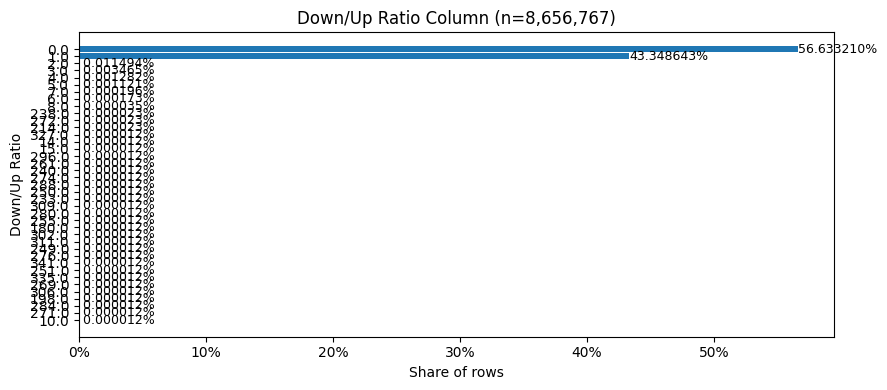

In [18]:
# 1) to DataFrame sorted by count
vc = (pd.Series(counts, dtype="int64")
        .sort_values(ascending=False)
        .rename_axis("Traffic Type")
        .to_frame("count"))
vc["share"] = vc["count"] / total

# 2) plot share (percent)
plt.figure(figsize=(9, 4))
bars = plt.barh(vc.index.astype(str), vc["share"].values)
plt.title(f"Down/Up Ratio Column (n={total:,})")
plt.xlabel("Share of rows"); plt.ylabel("Down/Up Ratio")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().invert_yaxis()  # largest on top

for r, v in zip(bars, vc["share"].values):
    plt.text(v, r.get_y()+r.get_height()/2, f"{v:10%}", va="center", ha="left", fontsize=9)

plt.tight_layout()
plt.show()

In [19]:
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
0,192.168.1.90-192.168.1.3-53930-64738-6,192.168.1.90,53930.0,192.168.1.3,64738,6.0,01/01/1970 07:41:46 AM,52601172.0,1701.0,1793.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign,Audio,Audio
1,192.168.1.3-192.168.1.90-64738-37700-6,192.168.1.3,64738.0,192.168.1.90,37700,6.0,01/01/1970 07:41:46 AM,119106944.0,36.0,57.0,...,3416174.0,19996926.0,14078617.0,5001511.0,1737.400024,5003516.0,5000449.0,Benign,Audio,Audio
2,192.168.1.3-192.168.1.90-22-40854-6,192.168.1.3,22.0,192.168.1.90,40854,6.0,01/01/1970 07:41:46 AM,5589.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign,Audio,Audio
3,192.168.1.70-192.168.1.3-55422-64738-6,192.168.1.70,55422.0,192.168.1.3,64738,6.0,01/01/1970 07:41:47 AM,118166560.0,3932.0,4196.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign,Audio,Audio
4,192.168.1.90-192.168.1.3-59658-64738-17,192.168.1.90,59658.0,192.168.1.3,64738,17.0,01/01/1970 07:41:50 AM,119988384.0,25.0,6795.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign,Audio,Audio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,192.168.1.70-192.168.1.90-36019-0-6,192.168.1.70,36019.0,192.168.1.90,0,6.0,01/01/1970 04:51:49 AM,2067234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Malicious,DoS,DoS RST
999996,192.168.1.70-192.168.1.90-36048-0-6,192.168.1.70,36048.0,192.168.1.90,0,6.0,01/01/1970 04:51:49 AM,1972233.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Malicious,DoS,DoS RST
999997,192.168.1.70-192.168.1.90-36037-0-6,192.168.1.70,36037.0,192.168.1.90,0,6.0,01/01/1970 04:51:49 AM,2067414.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Malicious,DoS,DoS RST
999998,192.168.1.70-192.168.1.90-20621-0-6,192.168.1.70,20621.0,192.168.1.90,0,6.0,01/01/1970 04:51:49 AM,2232870.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Malicious,DoS,DoS RST


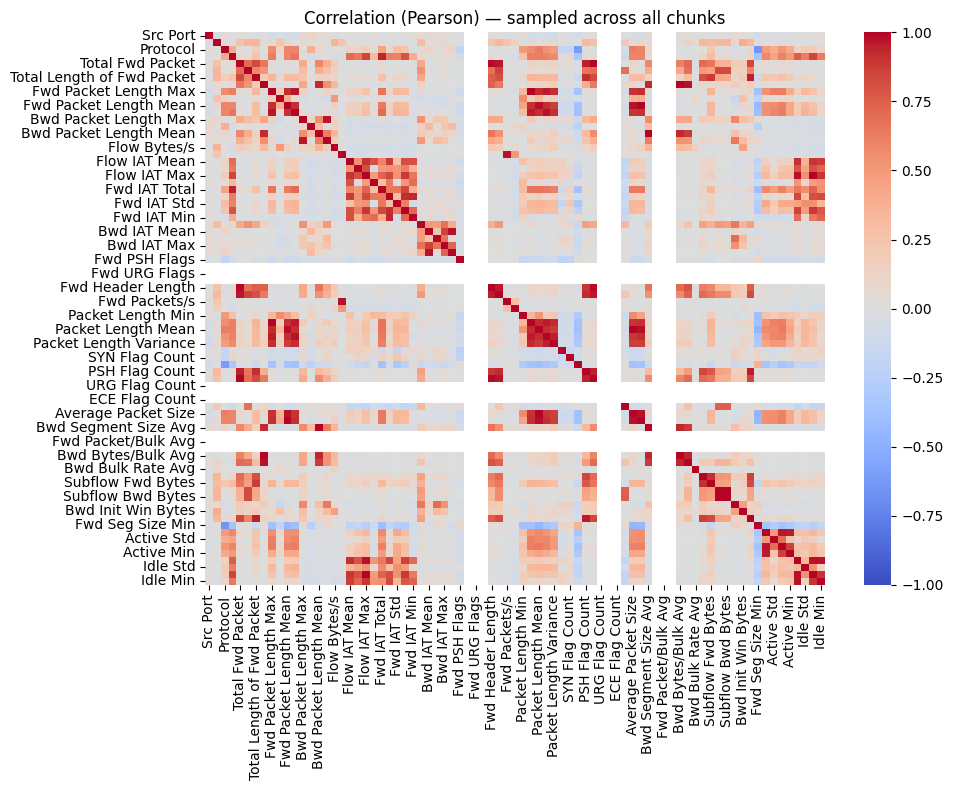

In [20]:
paths = sorted(glob.glob("data/chunks/part_*.parquet"))
engine = "pyarrow"
frac   = 0.2      

# find the numeric columns
num_cols = pd.read_parquet(paths[0], engine=engine).select_dtypes("number").columns.tolist()

# collect a balanced sample
parts, seen = [], 0
for p in paths:
    df1 = pd.read_parquet(p, columns=num_cols, engine=engine)
    if len(df1) == 0: 
        continue
    k = max(1, int(len(df)*frac))
    samp = df.sample(n=min(k, len(df1)), random_state=42)
    parts.append(samp)
    seen += len(samp)

S = pd.concat(parts, ignore_index=True)

# correlation (Pearson; do Spearman by method="spearman")
corr = S.corr(method="pearson", numeric_only=True, min_periods=100)

# heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm")
plt.title("Correlation (Pearson) — sampled across all chunks")
plt.tight_layout(); plt.show()

In [21]:
print(corr)

                  Src Port  Dst Port  Protocol  Flow Duration  \
Src Port          1.000000 -0.036772  0.063970      -0.023604   
Dst Port         -0.036772  1.000000 -0.007020       0.019403   
Protocol          0.063970 -0.007020  1.000000       0.414853   
Flow Duration    -0.023604  0.019403  0.414853       1.000000   
Total Fwd Packet  0.015094  0.270940  0.019450       0.079492   
...                    ...       ...       ...            ...   
Active Min       -0.011226  0.031184  0.417644       0.498822   
Idle Mean         0.025602 -0.016986  0.142506       0.761119   
Idle Std         -0.014164 -0.007903  0.199542       0.621224   
Idle Max          0.013273 -0.017218  0.190873       0.845910   
Idle Min          0.032562 -0.015961  0.093472       0.645914   

                  Total Fwd Packet  Total Bwd packets  \
Src Port                  0.015094           0.014391   
Dst Port                  0.270940           0.349955   
Protocol                  0.019450           0.0

In [22]:
cols = ['Fwd Packet Length Max','Fwd Packet Length Min']
results = df.pivot_table(index='Label',values=cols, aggfunc=['mean','std'],observed=False)

In [23]:
results

mean                                         std  \
          Fwd Packet Length Max Fwd Packet Length Min Fwd Packet Length Max   
Label                                                                         
Benign               353.986481              6.202703            465.961060   
Malicious            100.124100             47.458046            222.888336   

                                 
          Fwd Packet Length Min  
Label                            
Benign                15.703687  
Malicious             33.156704

In [24]:
rate = pd.crosstab(df['Protocol'], df['Label'], normalize='index')

In [25]:
rate

Label,Benign,Malicious
Protocol,,
0.0,0.967213,0.032787
6.0,0.000154,0.999846
17.0,0.000224,0.999776


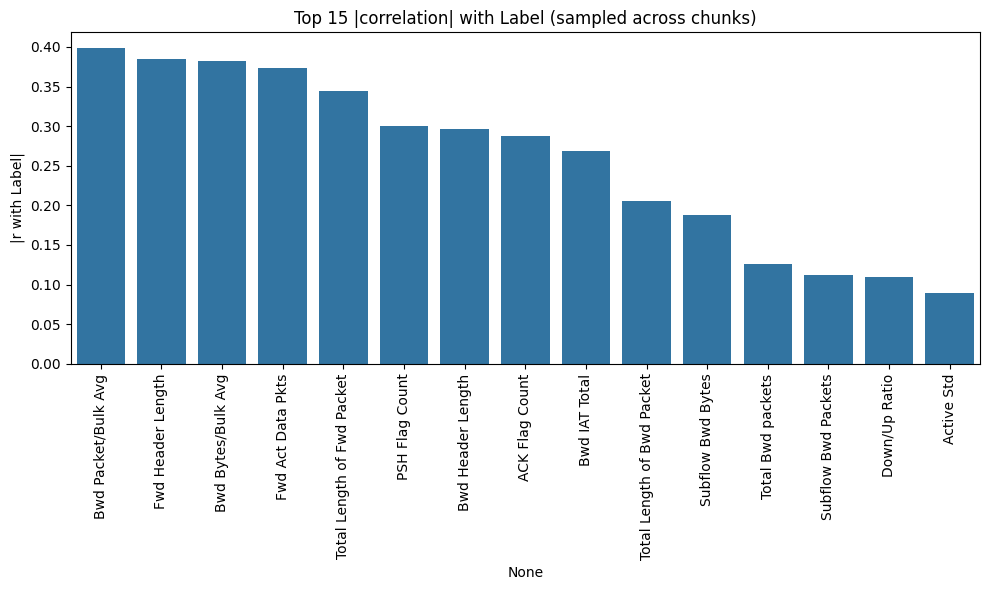

In [1]:
import glob, pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

paths  = sorted(glob.glob("data/chunks/part_*.parquet"))
engine = "pyarrow"
frac   = 0.2         
max_rows = None  

# discover numeric features
first    = pd.read_parquet(paths[0], engine=engine)
num_cols = first.select_dtypes('number').columns.tolist()

parts, seen = [], 0
for p in paths:
    df = pd.read_parquet(p, columns=list(dict.fromkeys(num_cols + ['Label'])),
                         engine=engine)
    if df.empty or 'Label' not in df.columns: 
        continue
    # numeric label 0/1
    df['Label_num'] = df['Label'].map({'Benign':0, 'Malicious':1}).astype('int8')

    samp = df.sample(frac=frac, random_state=42)
    parts.append(samp)
    seen += len(samp)
    if max_rows and seen >= max_rows:
        break

S = pd.concat(parts, ignore_index=True)

# features = numeric except the label columns
X = S.select_dtypes('number').drop(columns=['Label','Label_num'], errors='ignore')
# drop constants so corr isn’t NaN / divide-by-zero
X = X.loc[:, X.nunique(dropna=True) > 1]

# point-biserial (Pearson with binary y)
r = X.corrwith(S['Label_num'], method='pearson')\
     .replace([np.inf,-np.inf], np.nan).dropna().abs().sort_values(ascending=False)

# plot top-k
k = 15
plt.figure(figsize=(10,6))
sns.barplot(x=r.index[:k], y=r.values[:k])
plt.xticks(rotation=90); plt.ylabel('|r with Label|')
plt.title('Top 15 |correlation| with Label (sampled across chunks)')
plt.tight_layout(); plt.show()


In [2]:
print(r.head(20))

Bwd Packet/Bulk Avg           0.398537
Fwd Header Length             0.385165
Bwd Bytes/Bulk Avg            0.381908
Fwd Act Data Pkts             0.373082
Total Length of Fwd Packet    0.344245
PSH Flag Count                0.300418
Bwd Header Length             0.297021
ACK Flag Count                0.287066
Bwd IAT Total                 0.268190
Total Length of Bwd Packet    0.205493
Subflow Bwd Bytes             0.187558
Total Bwd packets             0.125555
Subflow Bwd Packets           0.111832
Down/Up Ratio                 0.109205
Active Std                    0.088689
Bwd Packet Length Max         0.069487
Bwd Segment Size Avg          0.069373
Bwd Packet Length Mean        0.069373
Subflow Fwd Bytes             0.065192
Active Max                    0.064588
dtype: float64
